In [1]:
import numpy as np  
import matplotlib.pyplot as plt  
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
from keras.models import Sequential  
from keras.layers import Dense  
from keras.layers import LSTM  
from keras.layers import GRU
from keras.layers import Dropout
import math
from sklearn.metrics import mean_squared_error
import time

Using TensorFlow backend.
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\K.N.W\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [3]:
# 같은 결과를 나오게 하기 위해 seed 설정
np.random.seed(0)

In [4]:
# 데이터 불러오기
dataset = pd.read_csv(r'KOSPI.csv', encoding = 'EUC-KR')  

In [5]:
dataset1 = pd.read_csv(r'KOSPI.csv', encoding = 'EUC-KR')  

In [6]:
dataset.head()

,Date,Cost,Rate,Percent,Amount,Money
0,1996.01.31,878.82,3.37,0.38%,28363,536608.0
1,1996.02.01,885.13,6.31,0.72%,40107,779606.0
2,1996.02.02,881.48,3.65,-0.41%,33760,639438.0
3,1996.02.03,884.63,3.15,0.36%,18014,365561.0
4,1996.02.05,890.68,6.05,0.68%,27581,477704.0


In [7]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [8]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

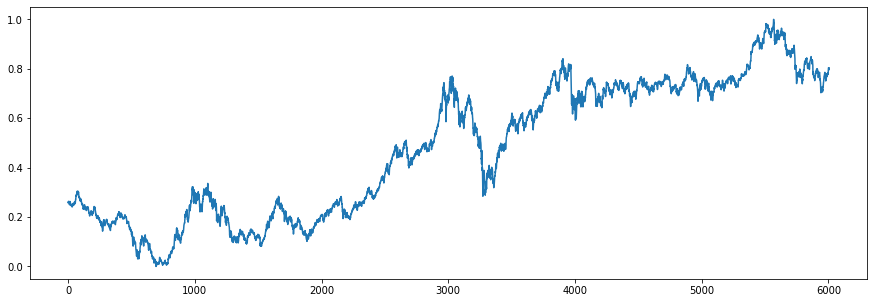

In [9]:
# 원본 데이터 보기
plt.figure(figsize = (15, 5))
plt.plot(dataset)
plt.show()

In [10]:
dataset

array([[0.2583136 ],
       [0.26103555],
       [0.25946105],
       ...,
       [0.80115521],
       [0.795487  ],
       [0.80274697]])

In [11]:
data_df = pd.DataFrame(dataset, columns=['Cost'], index=dataset1['Date'])
data_df.head()

,Cost
Date,
1996.01.31,0.258314
1996.02.01,0.261036
1996.02.02,0.259461
1996.02.03,0.260820
1996.02.05,0.263430


In [12]:
row = int(round(dataset.shape[0] * 0.9))
train_df = data_df[:row]
test_df = data_df[row:]

In [13]:
row

5405

In [14]:
for s in range(1, 11):
    train_df['shift_{}'.format(s)] = train_df['Cost'].shift(s+7)
    test_df['shift_{}'.format(s)] = test_df['Cost'].shift(s+7)

train_df.head(13)

C:\Users\K.N.W\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\K.N.W\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cost,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Date,,,,,,,,,,,
1996.01.31,0.258314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.01,0.261036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.02,0.259461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.03,0.260820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.05,0.263430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.06,0.259345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.07,0.260449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.08,0.262709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.09,0.259634,0.258314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
X_train = train_df.dropna().drop('Cost', axis=1)
y_train = train_df.dropna()[['Cost']]

X_test = test_df.dropna().drop('Cost', axis=1)
y_test = test_df.dropna()[['Cost']]


In [16]:
X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Date,,,,,,,,,,
1996.02.22,0.256756,0.259634,0.262709,0.260449,0.259345,0.263430,0.260820,0.259461,0.261036,0.258314
1996.02.23,0.252404,0.256756,0.259634,0.262709,0.260449,0.259345,0.263430,0.260820,0.259461,0.261036
1996.02.24,0.249410,0.252404,0.256756,0.259634,0.262709,0.260449,0.259345,0.263430,0.260820,0.259461
1996.02.26,0.254500,0.249410,0.252404,0.256756,0.259634,0.262709,0.260449,0.259345,0.263430,0.260820
1996.02.27,0.254229,0.254500,0.249410,0.252404,0.256756,0.259634,0.262709,0.260449,0.259345,0.263430


In [17]:
y_train.head()

,Cost
Date,
1996.02.22,0.259513
1996.02.23,0.257334
1996.02.24,0.253909
1996.02.26,0.249785
1996.02.27,0.250139


In [18]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)


(5388, 10)
[[0.25675635 0.25963359 0.26270927 ... 0.25946105 0.26103555 0.2583136 ]
 [0.25240382 0.25675635 0.25963359 ... 0.26081986 0.25946105 0.26103555]
 [0.2494101  0.25240382 0.25675635 ... 0.26342966 0.26081986 0.25946105]
 ...
 [0.86733615 0.86533891 0.8698036  ... 0.83057903 0.83231314 0.83161432]
 [0.86935497 0.86733615 0.86533891 ... 0.83671744 0.83057903 0.83231314]
 [0.86838439 0.86935497 0.86733615 ... 0.84602211 0.83671744 0.83057903]]
(5388, 1)
[[0.25951281]
 [0.25733439]
 [0.2539093 ]
 ...
 [0.88988823]
 [0.89522429]
 [0.8942192 ]]


In [19]:
X_train_t = X_train.reshape(X_train.shape[0], 10, 1)
X_test_t = X_test.reshape(X_test.shape[0], 10, 1)

print("최종 LSTM DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 LSTM DATA
(5388, 10, 1)
[[[0.25675635]
  [0.25963359]
  [0.26270927]
  ...
  [0.25946105]
  [0.26103555]
  [0.2583136 ]]

 [[0.25240382]
  [0.25675635]
  [0.25963359]
  ...
  [0.26081986]
  [0.25946105]
  [0.26103555]]

 [[0.2494101 ]
  [0.25240382]
  [0.25675635]
  ...
  [0.26342966]
  [0.26081986]
  [0.25946105]]

 ...

 [[0.86733615]
  [0.86533891]
  [0.8698036 ]
  ...
  [0.83057903]
  [0.83231314]
  [0.83161432]]

 [[0.86935497]
  [0.86733615]
  [0.86533891]
  ...
  [0.83671744]
  [0.83057903]
  [0.83231314]]

 [[0.86838439]
  [0.86935497]
  [0.86733615]
  ...
  [0.84602211]
  [0.83671744]
  [0.83057903]]]
[[0.25951281]
 [0.25733439]
 [0.2539093 ]
 ...
 [0.88988823]
 [0.89522429]
 [0.8942192 ]]


In [20]:
model = Sequential()

model.add(LSTM(128, return_sequences=True, input_shape=(10, 1)))
model.add(LSTM(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 128)           66560     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 116,033
Trainable params: 116,033
Non-trainable params: 0
_________________________________________________________________


In [21]:
start = time.time()
model.fit(X_train_t, y_train,
    batch_size=30,
    epochs=100)
end = time.time()
total = end-start

print(total)


Epoch 1/100
5388/5388 [==============================] - 3s 491us/step - loss: 0.0057 0s - l
Epoch 2/100
5388/5388 [==============================] - 2s 357us/step - loss: 6.4529e-04
Epoch 3/100
5388/5388 [==============================] - 2s 333us/step - loss: 6.4953e-04
Epoch 4/100
5388/5388 [==============================] - 2s 333us/step - loss: 6.5783e-04
Epoch 5/100
5388/5388 [==============================] - 2s 324us/step - loss: 6.5515e-04
Epoch 6/100
5388/5388 [==============================] - 2s 325us/step - loss: 6.3269e-04
Epoch 7/100
5388/5388 [==============================] - 2s 322us/step - loss: 7.0127e-04
Epoch 8/100
5388/5388 [==============================] - 2s 320us/step - loss: 6.5239e-04
Epoch 9/100
5388/5388 [==============================] - 2s 334us/step - loss: 7.0645e-04
Epoch 10/100
5388/5388 [==============================] - 2s 309us/step - loss: 6.7826e-04
Epoch 11/100
5388/5388 [==============================] - 2s 313us/step - loss: 7.3012e-04
Epoc

5388/5388 [==============================] - 2s 411us/step - loss: 5.3896e-04
Epoch 89/100
5388/5388 [==============================] - 2s 384us/step - loss: 5.4140e-04
Epoch 90/100
5388/5388 [==============================] - 2s 451us/step - loss: 5.6274e-04
Epoch 91/100
5388/5388 [==============================] - 2s 386us/step - loss: 5.2526e-04
Epoch 92/100
5388/5388 [==============================] - 2s 363us/step - loss: 5.2820e-04
Epoch 93/100
5388/5388 [==============================] - 2s 353us/step - loss: 5.2990e-04
Epoch 94/100
5388/5388 [==============================] - 2s 352us/step - loss: 5.2885e-04
Epoch 95/100
5388/5388 [==============================] - 2s 419us/step - loss: 5.3651e-04
Epoch 96/100
5388/5388 [==============================] - 2s 421us/step - loss: 5.6405e-04
Epoch 97/100
5388/5388 [==============================] - 2s 373us/step - loss: 5.2931e-04
Epoch 98/100
5388/5388 [==============================] - 2s 378us/step - loss: 5.6295e-04 0s - loss:
E

<function matplotlib.pyplot.show(*args, **kw)>

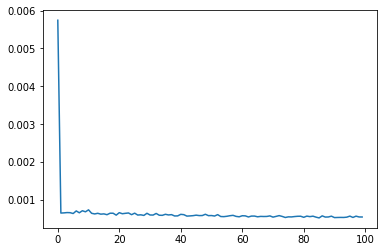

In [22]:
plt.plot(model.history.history['loss'])
plt.show

In [23]:
start = time.time()
y_pred = model.predict(X_test_t)
end = time.time()
total = end-start

print(total)

0.18088078498840332


In [24]:
mse = 0
for i in range(len(y_pred)):
    mse = mse+(y_test[i]-y_pred[i])**2
mse = mse/len(y_pred[0])
mse

array([0.88679405])

In [25]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)

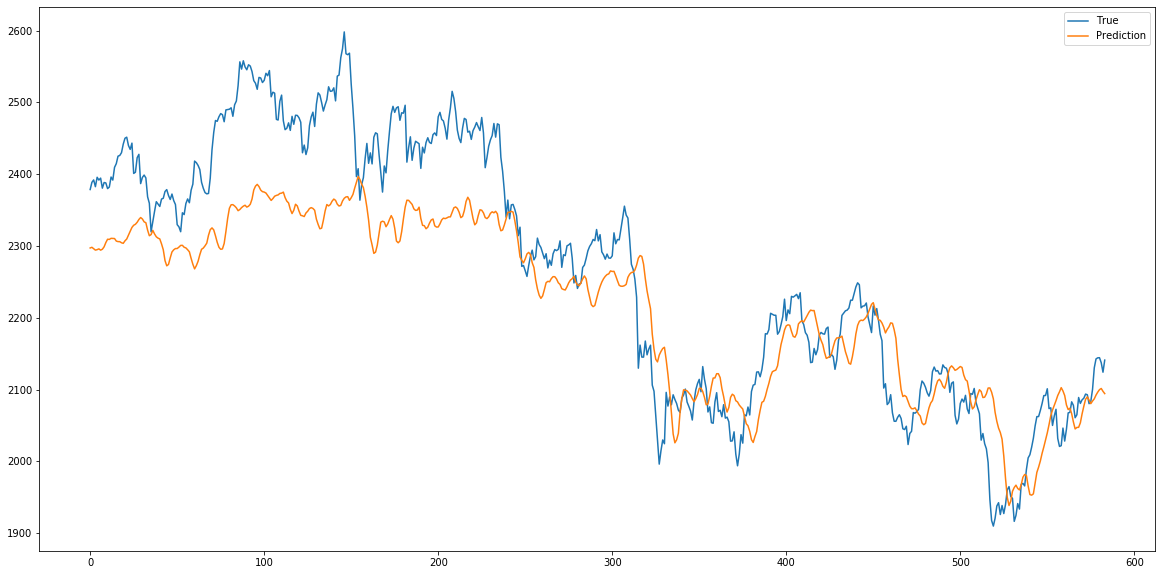

In [26]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()

In [27]:
# 데이터 불러오기
dataset = pd.read_csv(r'KOSPI.csv', encoding = 'EUC-KR')  

In [28]:
# 필요한 부분만 불러오기
dataset = dataset.iloc[:, 1:2].values  

In [29]:
# scikit-learn 라이브러리 의 MinMaxScaler 전처리 클래스를 사용하여 데이터 세트를 쉽게 정규화.
# MinMaxScaler : 모든 특성들이 0 과 1 사이에 위치하도록 데이터를 비례적으로 조정

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [30]:
data_df = pd.DataFrame(dataset, columns=['Cost'], index=dataset1['Date'])
data_df.head()

,Cost
Date,
1996.01.31,0.258314
1996.02.01,0.261036
1996.02.02,0.259461
1996.02.03,0.260820
1996.02.05,0.263430


In [31]:
row = int(round(dataset.shape[0] * 0.9))
train_df = data_df[:row]
test_df = data_df[row:]

In [36]:
for s in range(1, 11):
    train_df['shift_{}'.format(s)] = train_df['Cost'].shift(s+7)
    test_df['shift_{}'.format(s)] = test_df['Cost'].shift(s+7)

train_df.head(13)

C:\Users\K.N.W\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\K.N.W\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Cost,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10
Date,,,,,,,,,,,
1996.01.31,0.258314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.01,0.261036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.02,0.259461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.03,0.260820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.05,0.263430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.06,0.259345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.07,0.260449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.08,0.262709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996.02.09,0.259634,0.258314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
X_train = train_df.dropna().drop('Cost', axis=1)
y_train = train_df.dropna()[['Cost']]

X_test = test_df.dropna().drop('Cost', axis=1)
y_test = test_df.dropna()[['Cost']]

In [38]:
X_train = X_train.values
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)


(5388, 10)
[[0.25675635 0.25963359 0.26270927 ... 0.25946105 0.26103555 0.2583136 ]
 [0.25240382 0.25675635 0.25963359 ... 0.26081986 0.25946105 0.26103555]
 [0.2494101  0.25240382 0.25675635 ... 0.26342966 0.26081986 0.25946105]
 ...
 [0.86733615 0.86533891 0.8698036  ... 0.83057903 0.83231314 0.83161432]
 [0.86935497 0.86733615 0.86533891 ... 0.83671744 0.83057903 0.83231314]
 [0.86838439 0.86935497 0.86733615 ... 0.84602211 0.83671744 0.83057903]]
(5388, 1)
[[0.25951281]
 [0.25733439]
 [0.2539093 ]
 ...
 [0.88988823]
 [0.89522429]
 [0.8942192 ]]


In [39]:
X_train_t = X_train.reshape(X_train.shape[0], 10, 1)
X_test_t = X_test.reshape(X_test.shape[0], 10, 1)

print("최종 GRU DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)


최종 GRU DATA
(5388, 10, 1)
[[[0.25675635]
  [0.25963359]
  [0.26270927]
  ...
  [0.25946105]
  [0.26103555]
  [0.2583136 ]]

 [[0.25240382]
  [0.25675635]
  [0.25963359]
  ...
  [0.26081986]
  [0.25946105]
  [0.26103555]]

 [[0.2494101 ]
  [0.25240382]
  [0.25675635]
  ...
  [0.26342966]
  [0.26081986]
  [0.25946105]]

 ...

 [[0.86733615]
  [0.86533891]
  [0.8698036 ]
  ...
  [0.83057903]
  [0.83231314]
  [0.83161432]]

 [[0.86935497]
  [0.86733615]
  [0.86533891]
  ...
  [0.83671744]
  [0.83057903]
  [0.83231314]]

 [[0.86838439]
  [0.86935497]
  [0.86733615]
  ...
  [0.84602211]
  [0.83671744]
  [0.83057903]]]
[[0.25951281]
 [0.25733439]
 [0.2539093 ]
 ...
 [0.88988823]
 [0.89522429]
 [0.8942192 ]]


In [40]:
model = Sequential()

model.add(GRU(128, return_sequences=True, input_shape=(10, 1)))
model.add(GRU(64, return_sequences=False))

model.add(Dense(1, activation='linear'))

model.compile(loss='mse', optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 10, 128)           49920     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37056     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 87,041
Trainable params: 87,041
Non-trainable params: 0
_________________________________________________________________


In [41]:
start = time.time()
model.fit(X_train_t, y_train,
    batch_size=30,
    epochs=100)
end = time.time()
total = end-start

print(total)

Epoch 1/100
5388/5388 [==============================] - 3s 589us/step - loss: 0.0061
Epoch 2/100
5388/5388 [==============================] - 2s 385us/step - loss: 7.7622e-04
Epoch 3/100
5388/5388 [==============================] - 2s 412us/step - loss: 7.7357e-04
Epoch 4/100
5388/5388 [==============================] - 2s 419us/step - loss: 7.5003e-04
Epoch 5/100
5388/5388 [==============================] - 2s 400us/step - loss: 8.0268e-04
Epoch 6/100
5388/5388 [==============================] - 2s 389us/step - loss: 7.4369e-04
Epoch 7/100
5388/5388 [==============================] - 2s 387us/step - loss: 7.3444e-04
Epoch 8/100
5388/5388 [==============================] - 2s 393us/step - loss: 7.5757e-04
Epoch 9/100
5388/5388 [==============================] - 2s 393us/step - loss: 7.2669e-04
Epoch 10/100
5388/5388 [==============================] - 3s 486us/step - loss: 7.2692e-04
Epoch 11/100
5388/5388 [==============================] - 3s 483us/step - loss: 7.3133e-04
Epoch 12/100

5388/5388 [==============================] - 2s 366us/step - loss: 5.7067e-04
Epoch 92/100
5388/5388 [==============================] - 2s 389us/step - loss: 5.4118e-04
Epoch 93/100
5388/5388 [==============================] - 2s 379us/step - loss: 5.3113e-04
Epoch 94/100
5388/5388 [==============================] - 2s 388us/step - loss: 5.2065e-04
Epoch 95/100
5388/5388 [==============================] - 2s 431us/step - loss: 5.1253e-04
Epoch 96/100
5388/5388 [==============================] - 2s 452us/step - loss: 5.1659e-04
Epoch 97/100
5388/5388 [==============================] - 3s 501us/step - loss: 5.1680e-04
Epoch 98/100
5388/5388 [==============================] - 2s 434us/step - loss: 5.2206e-04
Epoch 99/100
5388/5388 [==============================] - 2s 384us/step - loss: 5.3939e-04
Epoch 100/100
5388/5388 [==============================] - 2s 377us/step - loss: 5.4252e-04
212.64921712875366


<function matplotlib.pyplot.show(*args, **kw)>

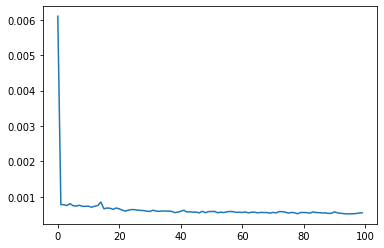

In [42]:
plt.plot(model.history.history['loss'])
plt.show

In [43]:
start = time.time()
y_pred = model.predict(X_test_t)
end = time.time()
total = end-start

print(total)

0.28084492683410645


In [44]:
testPredict = scaler.inverse_transform(y_pred)
Ydata = scaler.inverse_transform(y_test)


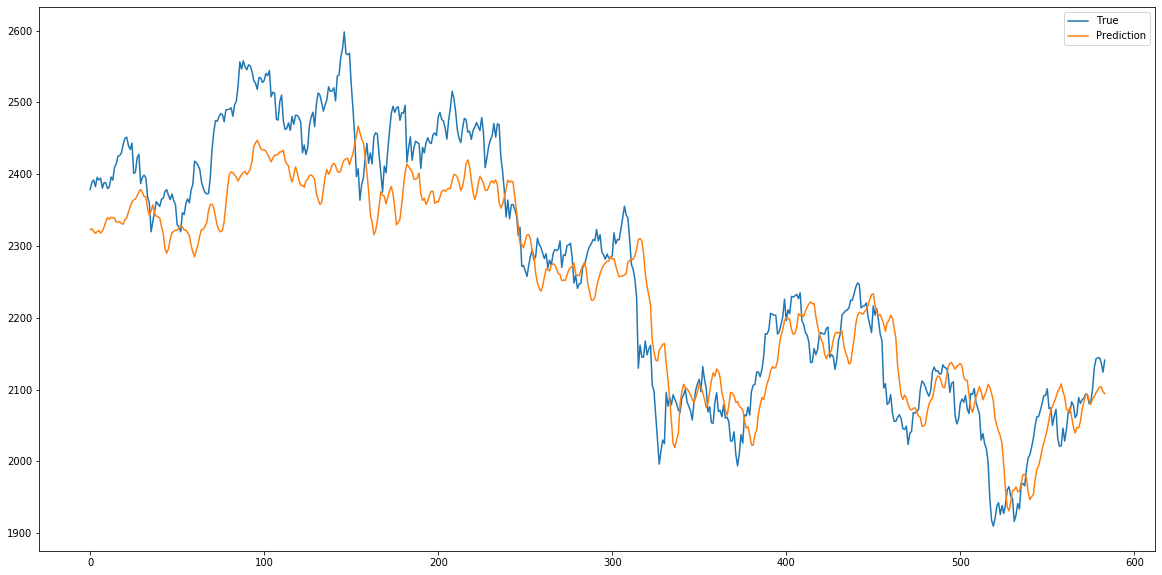

In [45]:
fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(Ydata, label='True')
ax.plot(testPredict, label='Prediction')
ax.legend()
plt.show()

In [46]:
mse = 0
for i in range(len(y_pred)):
    mse = mse+(y_test[i]-y_pred[i])**2
mse = mse/len(y_pred[0])
mse

array([0.5471218])